In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Загрузка данных

In [2]:
data = pd.read_csv('./data/amine_treatment.csv', on_bad_lines='skip')
# data.drop(data.columns[[19, 39, 59, 79]], axis = 1, inplace=True)
data

,"feed_gas temperature, C","feed_gas pressure, kPa","feed_gas mass flow, kg/h",feed_gas molecular weight,"feed_gas Mass density, kg/m3","feed_gas actual liquid flow, m3/h","feed_gas actual vapour flow, m3/h",feed_gas CO2 mol frac,feed_gas Methane mol frac,feed_gas Ethane mol frac,...,degased_amine Propane mol frac,degased_amine i-Butane mol frac,degased_amine n-Butane mol frac,degased_amine i-Pentane mol frac,degased_amine n-Pentane mol frac,degased_amine H2S mol frac,degased_amine H2O mol frac,degased_amine MDEAmine mol frac,degased_amine H2S ppm,degased_amine CO2 ppm
0,11.0,6701.325,112402.0,27.121070,191.254929,0.130398,587.577333,0.035909,0.582459,0.196545,...,0.000011,0.000006,8.684227e-06,2.043150e-06,5.846956e-08,0.003006,0.891003,0.091837,4563.197331,27150.985380
1,15.0,6701.325,7189.0,26.581625,148.785371,0.005769,48.312154,0.027312,0.624114,0.164571,...,0.000008,0.000029,6.954137e-06,3.370202e-06,3.641923e-07,0.000883,0.905058,0.093432,1339.590500,585.828354
2,21.0,6701.325,267149.0,25.217054,111.434534,0.281806,2397.080936,0.039796,0.641365,0.164661,...,0.000006,0.000004,6.452424e-06,2.022694e-07,2.974545e-07,0.020241,0.845373,0.084793,30723.101423,97022.215423
3,49.0,6701.325,180374.0,22.772565,71.452057,0.000000,2524.405963,0.034555,0.718608,0.123618,...,0.000006,0.000001,4.218402e-06,1.591794e-07,2.117856e-08,0.042466,0.844947,0.087394,64457.226732,49214.506788
4,55.0,6701.325,183485.0,21.177989,61.744621,0.000000,2971.675867,0.024895,0.831412,0.034035,...,0.000012,0.000008,7.007134e-07,1.090378e-06,8.329474e-07,0.020743,0.870504,0.090749,31485.508012,35029.146435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438795,39.0,6701.325,71172.0,23.884057,84.882427,0.018671,838.458765,0.008154,0.665711,0.185790,...,0.000013,0.000002,4.598371e-06,5.623081e-06,2.156165e-07,0.008638,0.896836,0.092552,13111.489911,3250.239989
438796,55.0,6701.325,250870.0,26.841841,91.233662,0.000000,2749.752608,0.029808,0.666191,0.030980,...,0.000012,0.000012,1.083035e-05,6.543813e-08,1.483835e-07,0.029416,0.863428,0.089181,44649.687953,35058.060135
438797,40.0,6701.325,226903.0,25.150587,90.514086,0.000000,2506.825301,0.012115,0.751703,0.044671,...,0.000002,0.000038,6.674917e-06,4.465347e-06,1.148576e-07,0.010216,0.892086,0.092126,15505.879704,10458.797944
438798,46.0,6701.325,136843.0,22.052538,69.188076,0.000000,1977.840810,0.011761,0.828779,0.006232,...,0.000012,0.000014,5.034747e-06,3.195420e-06,7.995646e-07,0.015325,0.887323,0.091665,23260.485878,10776.607598


In [3]:
data.isna().sum()

feed_gas temperature, C            0
feed_gas pressure, kPa             0
feed_gas mass flow, kg/h           0
feed_gas molecular weight          0
feed_gas Mass density, kg/m3       0
                                  ..
degased_amine H2S mol frac         0
degased_amine H2O mol frac         0
degased_amine MDEAmine mol frac    0
degased_amine H2S ppm              0
degased_amine CO2 ppm              0
Length: 121, dtype: int64

In [26]:
data_15_stages = data[data['Absorber number of stages'] == 15]
small_data = data_15_stages.sample(frac=0.3)
# small_data['h2s_mass_frac_outlet_vapour'] = small_data['h2s_mass_frac_outlet_vapour'] * 10000
# small_data['h2s_mass_frac_outlet_vapour']
small_data

,"feed_gas temperature, C","feed_gas pressure, kPa","feed_gas mass flow, kg/h",feed_gas molecular weight,"feed_gas Mass density, kg/m3","feed_gas actual liquid flow, m3/h","feed_gas actual vapour flow, m3/h",feed_gas CO2 mol frac,feed_gas Methane mol frac,feed_gas Ethane mol frac,...,degased_amine Propane mol frac,degased_amine i-Butane mol frac,degased_amine n-Butane mol frac,degased_amine i-Pentane mol frac,degased_amine n-Pentane mol frac,degased_amine H2S mol frac,degased_amine H2O mol frac,degased_amine MDEAmine mol frac,degased_amine H2S ppm,degased_amine CO2 ppm
425800,48.0,6701.325,81092.0,25.846591,89.507889,0.000000,905.976011,0.031881,0.691396,0.033537,...,0.000029,0.000006,1.881052e-05,2.283715e-06,5.979109e-07,0.005220,0.897955,0.092681,7923.225319,7621.491987
210220,23.0,6701.325,164320.0,25.128291,106.135759,0.101570,1548.104253,0.021818,0.745933,0.000146,...,0.000027,0.000035,5.345594e-06,8.276630e-07,1.759470e-06,0.003935,0.896544,0.092481,5972.577356,13279.169116
114070,43.0,6701.325,14560.0,26.138322,95.753682,0.000726,152.056090,0.019881,0.711245,0.047128,...,0.000009,0.000025,1.762066e-05,2.515072e-06,1.647486e-06,0.004368,0.899055,0.092793,6630.036168,6914.427124
315561,58.0,6701.325,274678.0,25.429251,80.091230,0.000000,3429.564011,0.032646,0.729939,0.035044,...,0.000006,0.000024,5.788545e-06,1.184163e-06,4.275375e-07,0.012040,0.874733,0.090251,18275.752601,44829.683564
209961,43.0,6701.325,282547.0,25.220844,89.204244,0.000000,3167.416572,0.027043,0.676088,0.097697,...,0.000021,0.000020,1.671411e-07,1.074254e-06,8.652590e-07,0.020041,0.874127,0.090400,30419.585611,29907.787240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203296,43.0,6701.325,142681.0,26.620687,101.287083,0.000000,1408.679127,0.025038,0.609016,0.173735,...,0.000012,0.000005,7.386396e-06,2.363491e-06,9.737901e-07,0.014638,0.878907,0.090685,22217.830820,30575.713837
67335,12.0,6701.325,154722.0,26.414911,171.030172,0.042577,904.604820,0.010849,0.591505,0.197813,...,0.000014,0.000016,7.472669e-06,2.703454e-06,1.230980e-06,0.010343,0.894747,0.092404,15699.274745,4385.101152
114356,46.0,6701.325,41950.0,29.615344,129.914598,0.000000,322.904436,0.036669,0.519361,0.185005,...,0.000014,0.000006,1.147281e-05,1.814013e-06,6.282393e-08,0.001825,0.902475,0.093159,2769.428803,4382.224140
86595,49.0,6701.325,168048.0,26.505042,93.557666,0.000000,1796.197015,0.028003,0.682232,0.061706,...,0.000016,0.000004,1.378537e-05,3.816843e-06,9.574026e-07,0.015833,0.883786,0.091278,24032.963563,17481.361702


In [27]:
list(data.columns)

['feed_gas temperature, C',
 'feed_gas pressure, kPa',
 'feed_gas mass flow, kg/h',
 'feed_gas molecular weight',
 'feed_gas Mass density, kg/m3',
 'feed_gas actual liquid flow, m3/h',
 'feed_gas actual vapour flow, m3/h',
 'feed_gas CO2 mol frac',
 'feed_gas Methane mol frac',
 'feed_gas Ethane mol frac',
 'feed_gas Propane mol frac',
 'feed_gas i-Butane mol frac',
 'feed_gas n-Butane mol frac',
 'feed_gas i-Pentane mol frac',
 'feed_gas n-Pentane mol frac',
 'feed_gas H2S mol frac',
 'feed_gas H2O mol frac',
 'feed_gas MDEAmine mol frac',
 'feed_gas H2S ppm',
 'feed_gas CO2 ppm',
 'Absorber number of stages',
 'lean_amine temperature, C',
 'lean_amine pressure, kPa',
 'lean_amine mass flow, kg/h',
 'lean_amine molecular weight',
 'lean_amine Mass density, kg/m3',
 'lean_amine actual liquid flow, m3/h',
 'lean_amine actual vapour flow, m3/h',
 'lean_amine CO2 mol frac',
 'lean_amine Methane mol frac',
 'lean_amine Ethane mol frac',
 'lean_amine Propane mol frac',
 'lean_amine i-Butane

# Графики

# Получаем обучающую и тестовую выборку

In [28]:
mini_data = small_data[['feed_gas temperature, C',
 'feed_gas pressure, kPa',
 'feed_gas mass flow, kg/h',
 'feed_gas molecular weight',
 'feed_gas Mass density, kg/m3',
 'feed_gas actual liquid flow, m3/h',
 'feed_gas actual vapour flow, m3/h',
 'feed_gas CO2 mol frac',
 'feed_gas Methane mol frac',
 'feed_gas Ethane mol frac',
 'feed_gas Propane mol frac',
 'feed_gas i-Butane mol frac',
 'feed_gas n-Butane mol frac',
 'feed_gas i-Pentane mol frac',
 'feed_gas n-Pentane mol frac',
 'feed_gas H2S mol frac',
 'feed_gas H2O mol frac',
 'feed_gas MDEAmine mol frac',
 'feed_gas H2S ppm',
 'feed_gas CO2 ppm',
'lean_amine temperature, C',
 'lean_amine pressure, kPa',
 'lean_amine mass flow, kg/h',
 'lean_amine molecular weight',
 'lean_amine Mass density, kg/m3',
 'lean_amine actual liquid flow, m3/h',
 'lean_amine actual vapour flow, m3/h',
 'lean_amine CO2 mol frac',
 'lean_amine Methane mol frac',
 'lean_amine Ethane mol frac',
 'lean_amine Propane mol frac',
 'lean_amine i-Butane mol frac',
 'lean_amine n-Butane mol frac',
 'lean_amine i-Pentane mol frac',
 'lean_amine n-Pentane mol frac',
 'lean_amine H2S mol frac',
 'lean_amine H2O mol frac',
 'lean_amine MDEAmine mol frac',
 'lean_amine H2S ppm',
 'lean_amine CO2 ppm',
'sweet_gas temperature, C',
'sweet_gas mass flow, kg/h',
'sweet_gas H2S ppm']]

# Создаем X и y
stream_names_to_remove = ['sweet_gas']
pattern = '|'.join(stream_names_to_remove)
cols_to_remove = small_data.filter(regex=pattern).columns

X = small_data.drop(cols_to_remove, axis=1)
y = small_data[['sweet_gas H2S ppm']]

# Собираем трансформер столбцов
ct = make_column_transformer(
    (MinMaxScaler(), ['feed_gas temperature, C',
 'feed_gas pressure, kPa',
 'feed_gas mass flow, kg/h',
 'feed_gas molecular weight',
 'feed_gas Mass density, kg/m3',
 'feed_gas actual liquid flow, m3/h',
 'feed_gas actual vapour flow, m3/h',
 'feed_gas CO2 mol frac',
 'feed_gas Methane mol frac',
 'feed_gas Ethane mol frac',
 'feed_gas Propane mol frac',
 'feed_gas i-Butane mol frac',
 'feed_gas n-Butane mol frac',
 'feed_gas i-Pentane mol frac',
 'feed_gas n-Pentane mol frac',
 'feed_gas H2S mol frac',
 'feed_gas H2O mol frac',
 'feed_gas MDEAmine mol frac',
 'feed_gas H2S ppm',
 'feed_gas CO2 ppm',
'lean_amine temperature, C',
 'lean_amine pressure, kPa',
 'lean_amine mass flow, kg/h',
 'lean_amine molecular weight',
 'lean_amine Mass density, kg/m3',
 'lean_amine actual liquid flow, m3/h',
 'lean_amine actual vapour flow, m3/h',
 'lean_amine CO2 mol frac',
 'lean_amine Methane mol frac',
 'lean_amine Ethane mol frac',
 'lean_amine Propane mol frac',
 'lean_amine i-Butane mol frac',
 'lean_amine n-Butane mol frac',
 'lean_amine i-Pentane mol frac',
 'lean_amine n-Pentane mol frac',
 'lean_amine H2S mol frac',
 'lean_amine H2O mol frac',
 'lean_amine MDEAmine mol frac',
 'lean_amine H2S ppm',
 'lean_amine CO2 ppm',])
)


# Создаем обучающую и тестовые выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Загружаем тренировочную выборку
ct.fit(X_train)

# Нормализуем данные
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)
X_train_normal

array([[0.54      , 0.        , 0.76730325, ..., 0.        , 0.        ,
        0.        ],
       [0.02      , 0.        , 0.89689956, ..., 0.        , 0.        ,
        0.        ],
       [0.98      , 0.        , 0.36783839, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.78      , 0.        , 0.98382555, ..., 0.        , 0.        ,
        0.        ],
       [0.68      , 0.        , 0.81990368, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.57813305, ..., 0.        , 0.        ,
        0.        ]])

# Собираем нейронную сеть

In [29]:
# Set random set
tf.random.set_seed(42)

# 1. Create a model
amine_treatment_model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
amine_treatment_model.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

# 3. Fit the model
amine_treatment_model.fit(X_train_normal, y_train, epochs=50)

Epoch 1/50
3291/3291 [==============================] - 5s 1ms/step - loss: 392.6072 - mae: 392.6072
Epoch 2/50
3291/3291 [==============================] - 4s 1ms/step - loss: 210.3613 - mae: 210.3613
Epoch 3/50
3291/3291 [==============================] - 4s 1ms/step - loss: 171.8542 - mae: 171.8542
Epoch 4/50
3291/3291 [==============================] - 4s 1ms/step - loss: 159.1458 - mae: 159.1458
Epoch 5/50
3291/3291 [==============================] - 4s 1ms/step - loss: 148.7958 - mae: 148.7958
Epoch 6/50
3291/3291 [==============================] - 5s 2ms/step - loss: 148.4461 - mae: 148.4461
Epoch 7/50
3291/3291 [==============================] - 5s 1ms/step - loss: 141.0378 - mae: 141.0378
Epoch 8/50
3291/3291 [==============================] - 5s 1ms/step - loss: 134.5659 - mae: 134.5659
Epoch 9/50
3291/3291 [==============================] - 5s 1ms/step - loss: 133.6943 - mae: 133.6943
Epoch 10/50
3291/3291 [==============================] - 5s 1ms/step - loss: 129.0032 - mae

In [30]:
amine_treatment_model.evaluate(X_test_normal)

823/823 [==============================] - 1s 822us/step - loss: 0.0000e+00 - mae: 0.0000e+00


[0.0, 0.0]

In [31]:
y_pred = amine_treatment_model.predict(X_test_normal)
y_pred

823/823 [==============================] - 1s 1ms/step


array([[ 3.3710124],
       [10.888787 ],
       [ 4.34363  ],
       ...,
       [ 7.241953 ],
       [ 8.96901  ],
       [ 8.142198 ]], dtype=float32)

In [32]:
y_test

,sweet_gas H2S ppm
241620,3.547226
343870,13.314557
279863,5.620676
105887,3.786006
294766,3.162524
...,...
64269,7.135740
405079,2.674775
347308,6.867982
96209,11.076222


In [16]:
# let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, tests and compares predictions to ground truht labels.
  """
  plt.figure(figsize=(10, 10))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label='Testing data')
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c='r', label='Predictions')
  # Show the legend
  plt.legend();

In [17]:
len(X_train_normal), len(y_train), len(X_test_normal), len(y_test), len(y_pred)

(175520, 175520, 43880, 43880, 43880)

In [18]:
# plt.figure(figsize=(10, 10))
# plt.scatter(X_train_normal[:, 0], y_train, c='b', label='Training data')

# plt.legend();

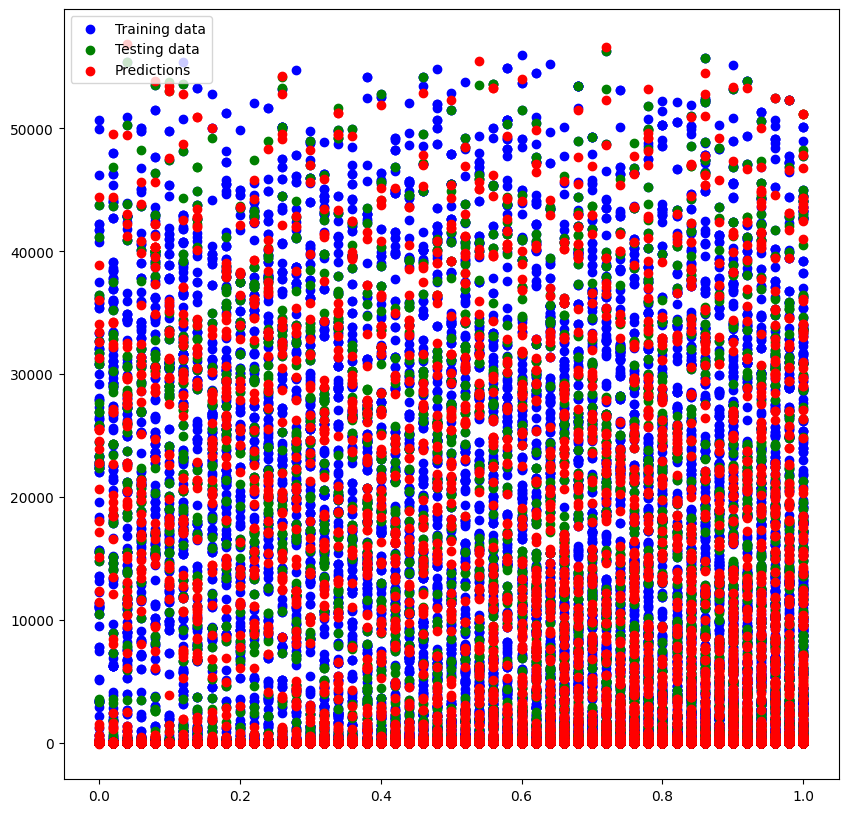

In [19]:
plot_predictions(train_data=X_train_normal[:, 0],
                     train_labels=y_train,
                     test_data=X_test_normal[:, 0],
                     test_labels=y_test,
                     predictions=y_pred
                )

In [36]:
len(y_pred[y_pred < 0])

309